## Imports

In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel

## Pure python function

In [62]:
def solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c):

    row, col = u.shape
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2.0
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2.0

    for n in range(nt + 1):
        for i in range(row):
            for j in range(col): 
                un[i, j] = u[i, j]
                vn[i, j] = u[i, j]
    
        u[1:, 1:] = (un[1:, 1:] - 
                     (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                      vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
        v[1:, 1:] = (vn[1:, 1:] -
                     (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                     vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
        
        for j in range(col):
            u[0, j] = 1
            u[-1, j] = 1
            v[0, j] = 1
            v[-1, j] = 1

        for i in range(row):
            u[i, 0] = 1
            u[i, -1] = 1
            v[i, 0] = 1
            v[i, -1] = 1


    return 0

## Numba accelerator

In [65]:
@njit(fastmath=True)
def solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    for n in range(nt + 1):
        for i in range(row):
            for j in range(col): 
                un[i, j] = u[i, j]
                vn[i, j] = u[i, j]
    
        u[1:, 1:] = (un[1:, 1:] - 
                     (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                      vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
        v[1:, 1:] = (vn[1:, 1:] -
                     (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                     vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
        
        for j in range(col):
            u[0, j] = 1
            u[-1, j] = 1
            v[0, j] = 1
            v[-1, j] = 1

        for i in range(row):
            u[i, 0] = 1
            u[i, -1] = 1
            v[i, 0] = 1
            v[i, -1] = 1


    return 0

## Pyccel accelerator

In [66]:
def solve_2d_nonlinearconv_pyccel(u:'float[:]', un:'float[:]', v:'float[:]', vn:'float[:]', nt:'int', dt:'float', dx:'float', dy:'float', c:'float'):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    for n in range(nt + 1):
        for i in range(row):
            for j in range(col): 
                un[i, j] = u[i, j]
                vn[i, j] = u[i, j]
    
        u[1:, 1:] = (un[1:, 1:] - 
                     (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                      vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
        v[1:, 1:] = (vn[1:, 1:] -
                     (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                     vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
        
        for j in range(col):
            u[0, j] = 1
            u[-1, j] = 1
            v[0, j] = 1
            v[-1, j] = 1

        for i in range(row):
            u[i, 0] = 1
            u[i, -1] = 1
            v[i, 0] = 1
            v[i, -1] = 1
            
    return 0

## Inputs

/tmp/ipykernel_9414/2231850841.py:23: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/tmp/ipykernel_9414/2231850841.py:29: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


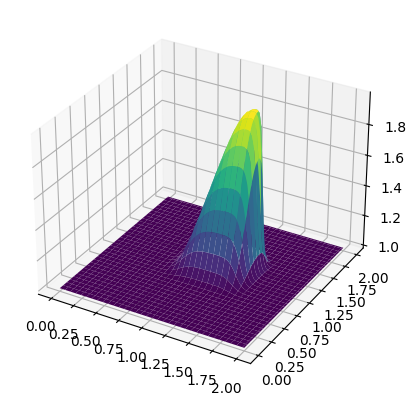

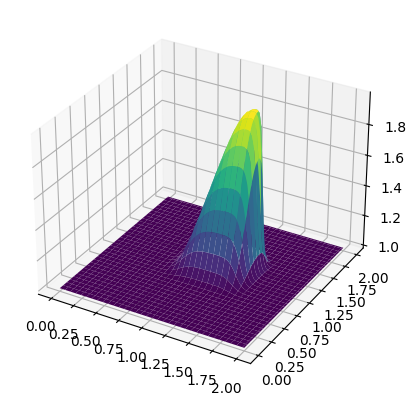

In [64]:
###variable declarations
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx)) ##create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))     

solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)


fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, v, cmap=cm.viridis)

In [50]:
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

/tmp/ipykernel_9414/1928308961.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/tmp/ipykernel_9414/1928308961.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


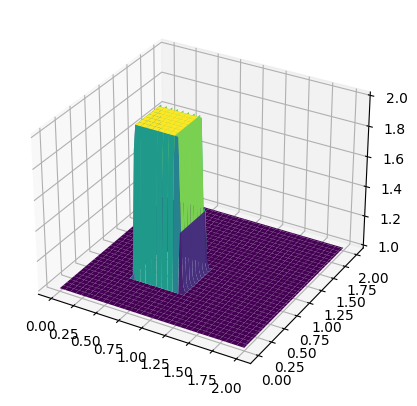

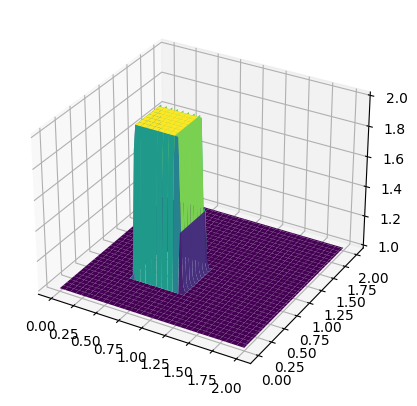

In [51]:
solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)
fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)


fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, v, cmap=cm.viridis)

In [12]:
u

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

## Call Funtions

### Pure function

In [11]:
%timeit solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

4.68 s ± 168 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [8]:
%timeit solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c)

4.32 ms ± 411 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [9]:
solve_2d_nonlinearconv_f90 = epyccel(solve_2d_nonlinearconv_pyccel)

In [10]:
%timeit solve_2d_nonlinearconv_f90(u, un, v, vn, nt, dt, dx, dy, c)

2.37 ms ± 58.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**<center>Thank you !</center>**